# Feature Detection

# imports

In [245]:
import cv2
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
%matplotlib inline

# useful methods

In [246]:
def color_filter(image, lower_upper_list): # 2nd param now takes a list to handle python3
    lower = np.array(lower_upper_list[0], dtype="uint8")
    upper = np.array(lower_upper_list[1], dtype="uint8")
    
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
    
    return output, mask

# import images from dirs

In [400]:
img_folder = "../images/school_pool/dice_"
img_base_name = "1_2"

#img_folder = "../images/"
#img_base_name = "jon_gate_21_71"

img_path = img_folder + img_base_name + ".jpg"
img = cv2.imread(img_path)

img.shape

(480, 744, 3)

# show image in RGB and HSV colorspace

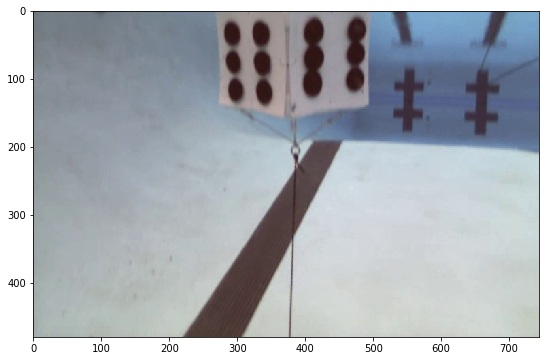

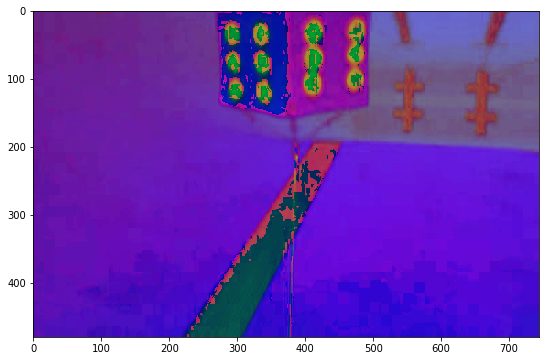

In [401]:
# RGB
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )
plt.show()

#HSV
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV) )
plt.show()

### GRAYSCALE

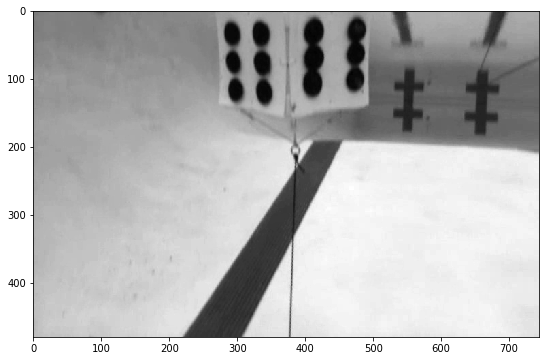

In [402]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 6) )
plt.imshow(img_gray, cmap="gray")
plt.show()

# SIFT

---

In [405]:
img_copy = img.copy()

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(img_gray, None)

#img_sift = cv2.drawKeypoints(img_gray, kp, img_copy)
img_sift = cv2.drawKeypoints(img_gray, kp, img_copy, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

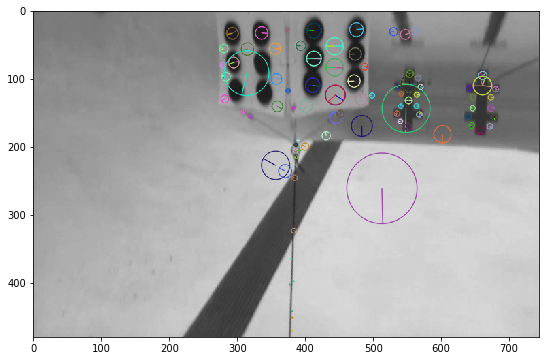

In [406]:
plt.figure(figsize=(10, 6) )
plt.imshow(img_sift, cmap="gray")
plt.show()

In [407]:
kp, des = sift.compute(img_gray, kp)
print(des[0])

[ 20.  43.  39. 129.  51.  15.   7.   9. 143. 100.   9.   3.   2.   4.
  13. 101.  29.   8.   2.  41.  22.   0.   0.  26.   0.   9.   8.  19.
   6.   0.   0.   0.  64.  47.  20.  91. 107.   3.   0.   5. 143. 135.
   5.   4.   2.   0.   0.  14.  58.  18.   4.  51.  38.   0.   0.   1.
   0.  16.   9.  11.   5.   0.   0.   0.  52.   1.   0.   4. 106.  57.
  32. 102. 143.   5.   1.   5.   7.   1.   5. 143.  36.   5.   2.  40.
  37.   0.   0.   9.   4.  14.   3.   5.   2.   0.   0.   0.  58.  34.
  12.  14.  21.  25.  33. 111.  54.   7.   0.  11.  28.   1.   7. 143.
   3.   2.   1.  22.  41.   1.   0.   3.   6.   9.   0.   1.   0.   0.
   0.   0.]


### OR in one step

In [287]:
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(img_gray, None)

# SURF

---

In [408]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

surf = cv2.xfeatures2d.SURF_create(400) # hessian threshold to 400

kp, des = surf.detectAndCompute(img_gray, None) # one step
len(kp)

171

In [409]:
hes_thresh = surf.getHessianThreshold()
print("Current Hessian Thresh:", hes_thresh)

#surf.setHessianThreshold(50000) # change from 400 to 50000 - setter

kp, des = surf.detectAndCompute(img_gray, None)
print("\nNumber of key points", len(kp) )

Current Hessian Thresh: 400.0

Number of key points 171


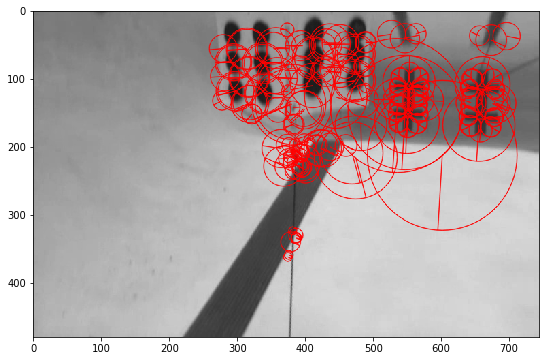

In [410]:
img_surf = cv2.drawKeypoints(img_gray, kp, None, (255,0,0), 4)

plt.figure(figsize=(10, 6) )
plt.imshow(img_surf, cmap="gray")
plt.show()

### U-SURF

False


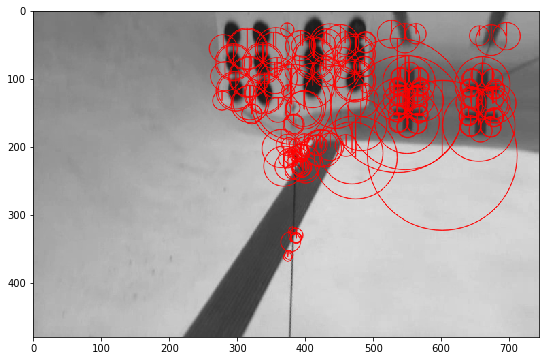

In [411]:
print( surf.getUpright() )

surf.setUpright(True)

kp = surf.detect(img_gray, None)
img_surf = cv2.drawKeypoints(img_gray, kp, None, (255,0,0), 4)

plt.figure(figsize=(10, 6) )
plt.imshow(img_surf)
plt.show()

In [412]:
print("SURF descriptor size", surf.descriptorSize() )

surf.getExtended()

surf.setExtended(True)

kp, des = surf.detectAndCompute(img_gray, None)

print( surf.descriptorSize() )

print( des.shape )

SURF descriptor size 64
128
(171, 128)


# FEATURE MATCHING

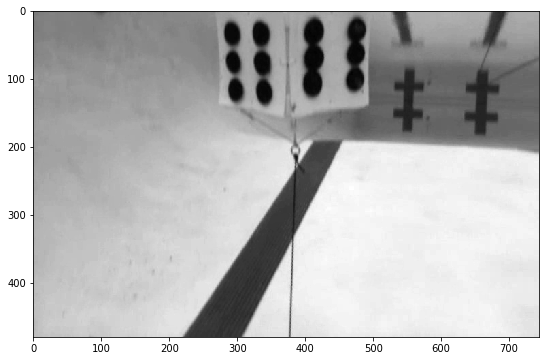

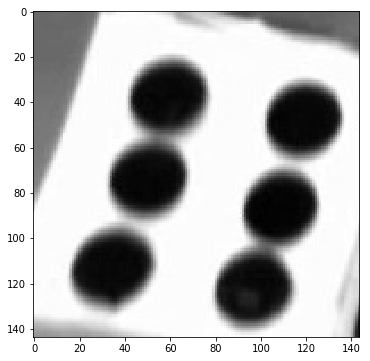

In [547]:
img_folder = "../images/school_pool/"

img1 = img_gray.copy()
img2_path = img_folder + 'dice_5_34_1.jpg' # training data
#img2_path = img_folder + 'small_dice_5_34_1.jpg' # training data
img2 = cv2.imread(img2_path, 0) # to grayscale

plt.figure(figsize=(10, 6) )
plt.imshow(img1, cmap="gray")
plt.show()
plt.figure(figsize=(10, 6) )
plt.imshow(img2, cmap="gray")
plt.show()

### init SIFT - detect and compute

In [548]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

### BRUTE FORCE Matching with *SIFT Descriptor* and *Ratio Test*

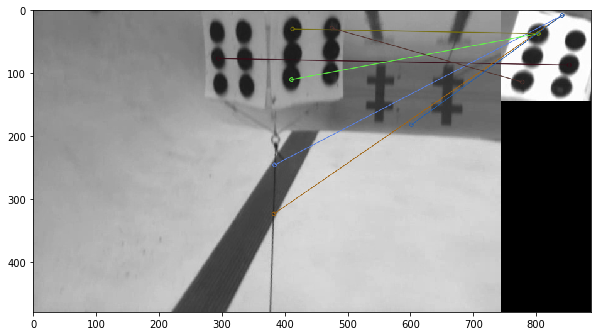

In [549]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
        #good.append(m)
        
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)

plt.figure(figsize=(10, 6) )
plt.imshow(img3)
plt.show()

### FLANN based Matcher

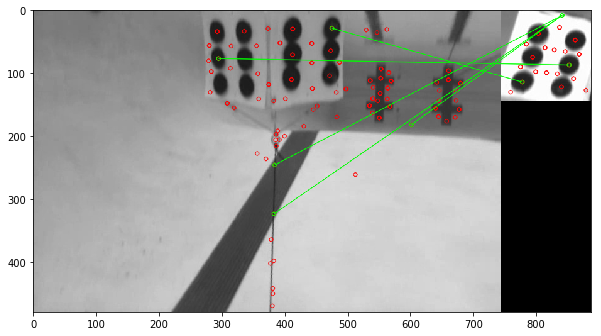

In [550]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1

index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Need to draw only good matches, so create a mask
matchesMask = [ [0, 0] for i in range(len(matches) )]

# ratio test
for i, (m, n) in enumerate(matches):
    if(m.distance < 0.7 * n.distance):
        matchesMask[i] = [1, 0]

draw_params = dict(
    matchColor = (0, 255, 0),
    singlePointColor = (255, 0, 0),
    matchesMask = matchesMask,
    flags = 0
)

img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)

plt.figure(figsize=(10, 6) )
plt.imshow(img3)
plt.show()

### Homography to find Object

In [551]:
# SIMILAR TO ABOVE

MIN_MATCH_COUNT = 1

index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# ratio test
good = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)

print(len(good))

5


In [552]:
if (len(good) > MIN_MATCH_COUNT):
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1, 1, 2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1, 1, 2)
    
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    
    matchesMask = mask.ravel().tolist()
    h, w = img1.shape # no ch since grayscale
    pts = np.float32([ [0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0] ]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, M)
    img2 = cv2.polylines(img2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)
else:
    print("Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
    
print(img1.shape)

error: OpenCV(3.4.1) /tmp/opencv-20180529-55469-97fkx6/opencv-3.4.1/modules/core/src/matmul.cpp:2268: error: (-215) scn + 1 == m.cols in function perspectiveTransform


In [553]:
draw_params = dict(
    matchColor = (0, 255, 0),
    singlePointColor = None,
    matchesMask = matchesMask,
    flags = 2
)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, good, None, **draw_params)

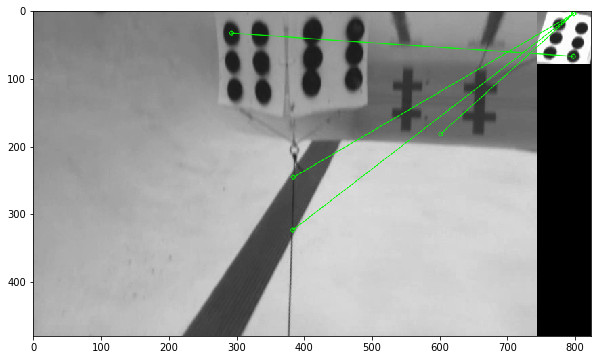

In [546]:
plt.figure(figsize=(10, 6) )
plt.imshow(img3)
plt.show()

# color filtering

### threshold values for RGB color space

In [313]:
## RGB
#lower_thresh = np.array([0, 0, 0]) # [0, 120, 0]
#upper_thresh = np.array([255, 255, 80])

#img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### threshold values for HSV color space

In [314]:
## HSV
lower_thresh = np.array([0, 0, 0]) # [0, 120, 0]
upper_thresh = np.array([255, 255, 100])

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# filter color

In [315]:
#img_color_filt, mask = color_filter(img_rgb, [lower_thresh, upper_thresh] ) # IN RGB COLOR SPACE so [R,G,B]
img_color_filt, mask = color_filter(img_hsv, [lower_thresh, upper_thresh] )

# show filtered

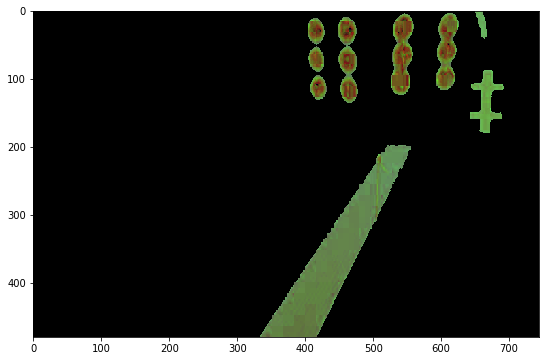

In [316]:
plt.figure(figsize=(10, 6) )
plt.imshow(img_color_filt) # original colorspace
plt.show()

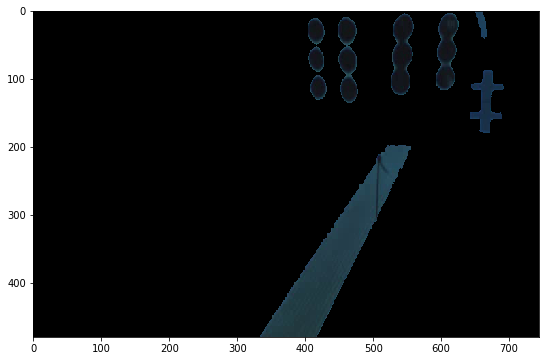

In [317]:
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_color_filt, cv2.COLOR_HSV2RGB) )
plt.show()

## Before MORPHS

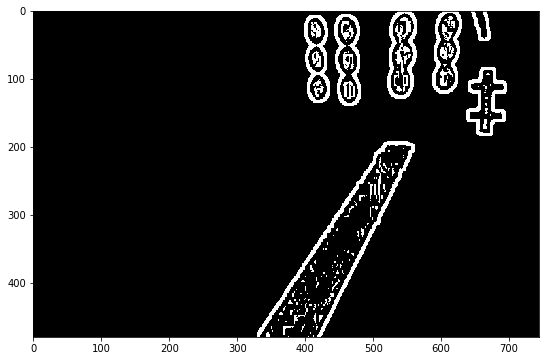

In [322]:
img_hsv2rgb = cv2.cvtColor(img_color_filt, cv2.COLOR_HSV2RGB)
img_gray = cv2.cvtColor(img_color_filt, cv2.COLOR_RGB2GRAY)

#ret_1, img_thresh_1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
img_thresh_1 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 3)
#img_thresh_1 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 3)

plt.figure(figsize=(10, 6) )
plt.imshow(img_thresh_1, cmap="gray")
plt.show()

216


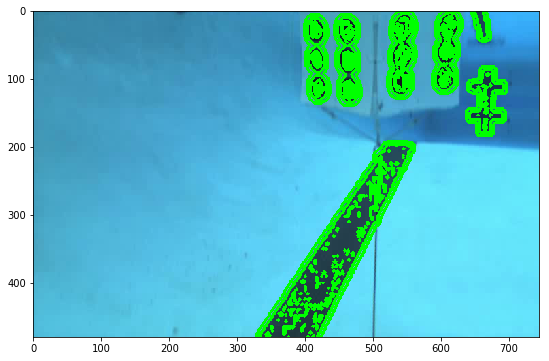

In [323]:
img1_c, img1_contours, img1_heirarchy = cv2.findContours(img_thresh_1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

threshold_color = [0, 255, 0] # green

img_copy = img.copy()
print(len(img1_contours))
##print(len(filt_cont) )

cv2.drawContours(img_copy, img1_contours, -1, threshold_color, 3)
#cv2.drawContours(img_copy, img1_contours, 0, threshold_color, 3) # 5

plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB) )
plt.show()

## MORPH

In [324]:
kernel = np.ones((5, 5), np.uint8)

*close -> erode -> dilate*

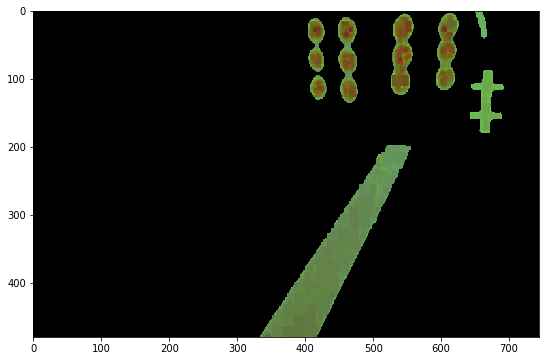

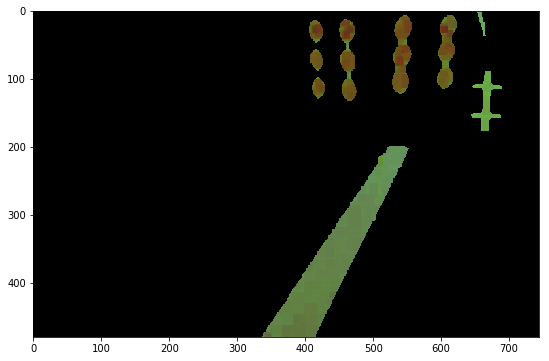

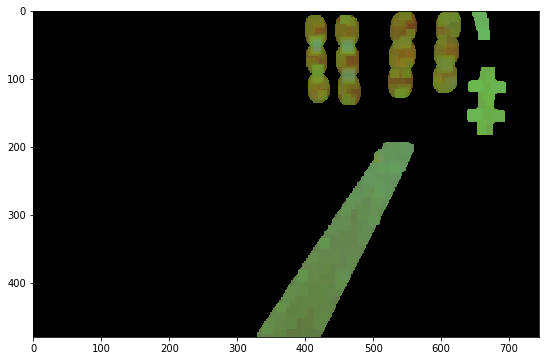

In [325]:
close_morph = cv2.morphologyEx(img_color_filt, cv2.MORPH_CLOSE, kernel)
erode_morph = cv2.erode(close_morph, kernel, iterations=1)
dilate_morph = cv2.dilate(erode_morph, kernel, iterations=3)

plt.figure(figsize=(10, 6) )
plt.imshow(close_morph, cmap="gray")
#plt.imshow(cv2.cvtColor(close_morph, cv2.COLOR_HSV2RGB) )
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(erode_morph, cmap="gray")
#plt.imshow(cv2.cvtColor(erode_morph, cv2.COLOR_HSV2RGB) )
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(dilate_morph, cmap="gray")
#plt.imshow(cv2.cvtColor(dilate_morph, cv2.COLOR_HSV2RGB) )
plt.show()

### THRESH

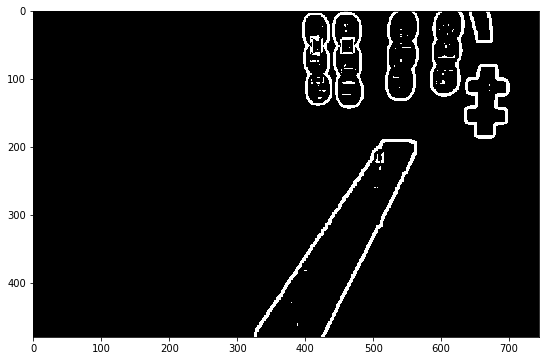

In [326]:
img_hsv2rgb = cv2.cvtColor(dilate_morph, cv2.COLOR_HSV2RGB)
img_gray = cv2.cvtColor(img_hsv2rgb, cv2.COLOR_RGB2GRAY)

#ret_1, img_thresh_1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
img_thresh_1 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 3)
#img_thresh_1 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 3)

plt.figure(figsize=(10, 6) )
plt.imshow(img_thresh_1, cmap="gray")
plt.show()

18


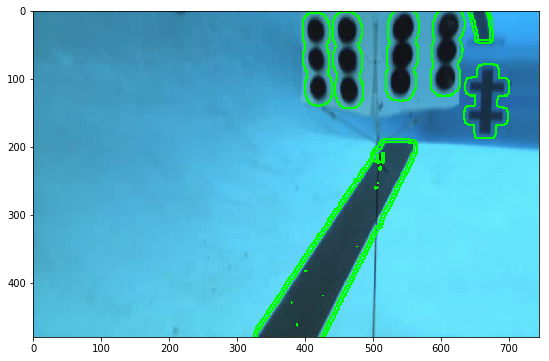

In [327]:
#img1_c, img1_contours, img1_heirarchy = cv2.findContours(img_thresh_1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img1_c, img1_contours, img1_heirarchy = cv2.findContours(img_thresh_1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

threshold_color = [0, 255, 0] # green

img_copy = img.copy()
print(len(img1_contours))

cv2.drawContours(img_copy, img1_contours, -1, threshold_color, 2)
#cv2.drawContours(img_copy, img1_contours, 39, threshold_color, 1)

plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB) )
plt.show()

## Bounding shapes

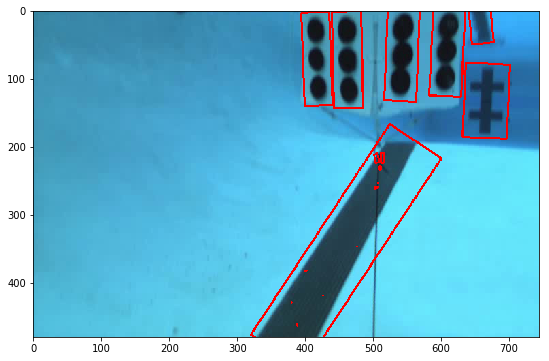

In [332]:
img_copy = img.copy()

rects = []
for cont in img1_contours:
    r = cv2.minAreaRect(cont)
    box = cv2.boxPoints(r)
    box = np.int0(box)
    rects.append(box)

cv2.drawContours(img_copy, rects, -1, (0,0,255), 2)

plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB) )
plt.show()

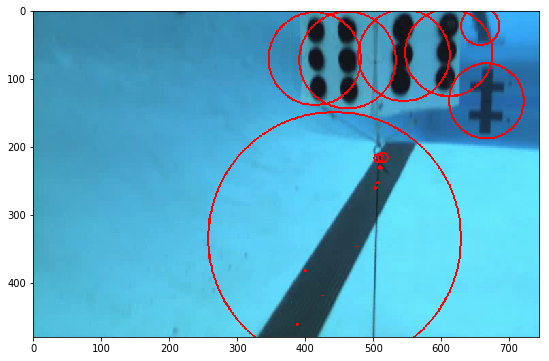

In [333]:
img_copy = img.copy()

circles = []
for cont in img1_contours:
    (x,y), radius = cv2.minEnclosingCircle(cont)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(img_copy, center, radius, (0, 0, 255), 2)

#cv2.drawContours(img_copy, rects, -1, (0,0,255), 2)

plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB) )
plt.show()

In [330]:
# error is since some points are too small

img_copy = img.copy()

circles = []
for cont in img1_contours:
    ellipse = cv2.fitEllipse(cont)
    cv2.ellipse(img_copy, ellipse, (0, 0, 255), 2)

#cv2.drawContours(img_copy, rects, -1, (0,0,255), 2)

plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB) )
plt.show()

error: OpenCV(3.4.1) /tmp/opencv-20180529-55469-97fkx6/opencv-3.4.1/modules/imgproc/src/shapedescr.cpp:310: error: (-201) There should be at least 5 points to fit the ellipse in function fitEllipse


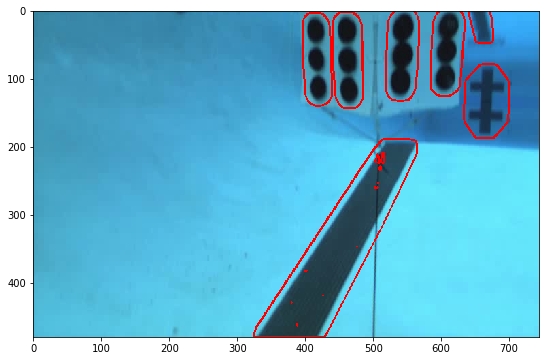

In [331]:
img_copy = img.copy()

conv = []
for cont in img1_contours:
    hull = cv2.convexHull(cont)
    conv.append(hull)

cv2.drawContours(img_copy, conv, -1, (0,0,255), 2)

plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB) )
plt.show()

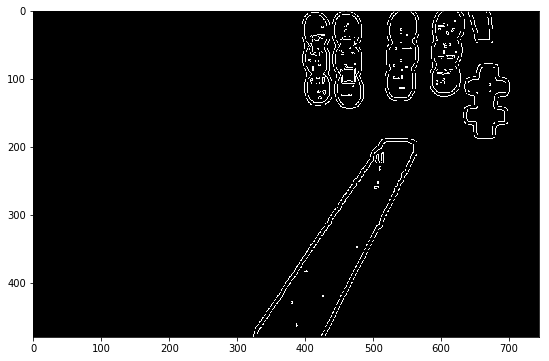

In [334]:
edges = cv2.Canny(img_thresh_1, 150, 255, apertureSize=5)

plt.figure(figsize=(10, 6) )
plt.imshow(edges, cmap="gray")
plt.show()